# 1. 데이터 준비 

In [14]:
from sklearn.datasets import load_breast_cancer # sklearn의 datasets로부터 load_breast_cancer를 불러옴
from sklearn.model_selection import train_test_split # sklearn의 model_selection로부터 train_test_split을 불러옴
from sklearn.tree import DecisionTreeClassifier, plot_tree # sklearn의 tree로부터 DecisionTreeClassifier, plot_tree를 불러옴
from sklearn.metrics import accuracy_score # sklearn의 metrics로부터 accuracy_score를 불러옴

import pandas as pd # pandas를 pd로 줄여서 사용
import matplotlib.pyplot as plt # matplotlib.pyplot을 plt로 줄여서 사용

# preprocessing
## 데이터 읽어오기

In [4]:
breast_cancer = load_breast_cancer() # load_breast_cancer를 breast_cancer로 줄여서 사용
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names) # 데이터 프레임 형태 > X를 생성

In [5]:
X1 = X[['mean area', 'mean compactness']] # 두 개 열만 X로 저장 > X1
y1 = breast_cancer.target # y1에 breast_cancer의 target 저장
#y1 = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
#y = breast_cancer.target
## malignant : 악성의 
## benign : 양성의


In [ ]:
X1["target"] = y1  # 데이터 통합 (target 추가) > X1에 y1 추가

In [7]:
X_train, X_test = train_test_split(X1, test_size = 0.3, random_state=1) # X1을 train과 test로 분리 > X_train, X_test

# 테스트 데이터 (input 데이터) 시각화


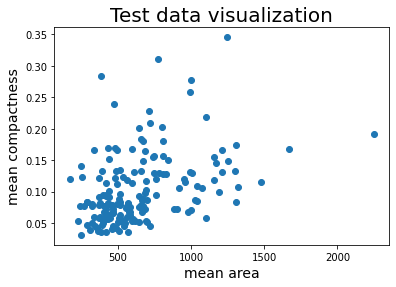

In [8]:
plt.plot(X_test[['mean area']], X_test[['mean compactness']],  marker='o', linestyle='') # X_test의 mean area와 mean compactness를 plot > marker는 o, linestyle은 없음

plt.title('Test data visualization', fontsize=20) # 제목 설정 > Test data visualization, 글자 크기 20
plt.xlabel('mean area', fontsize=14) # x축 이름 설정 > mean area, 글자 크기 14
plt.ylabel('mean compactness', fontsize=14) # y축 이름 설정 > mean compactness, 글자 크기 14
plt.show() # 그래프 출력

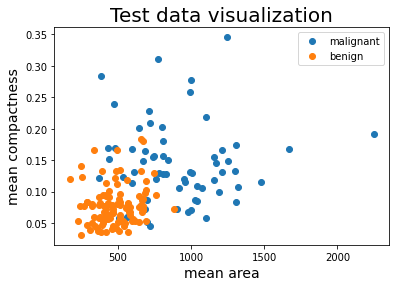

In [9]:
X_test_target0 = X_test[X_test["target"]==0 ] # target이 0인 데이터만 추출 > X_test_target0
X_test_target1 = X_test[X_test["target"]==1 ] # target이 1인 데이터만 추출 > X_test_target1


plt.plot(X_test_target0[['mean area']], X_test_target0[['mean compactness']],  marker='o', linestyle='') # X_test_target0의 mean area와 mean compactness를 plot > marker는 o, linestyle은 없음
plt.plot(X_test_target1[['mean area']], X_test_target1[['mean compactness']],  marker='o', linestyle='') # X_test_target1의 mean area와 mean compactness를 plot > marker는 o, linestyle은 없음

plt.title('Test data visualization', fontsize=20) # 제목 설정 > Test data visualization, 글자 크기 20
plt.xlabel('mean area', fontsize=14) # x축 이름 설정 > mean area, 글자 크기 14
plt.ylabel('mean compactness', fontsize=14) # y축 이름 설정 > mean compactness, 글자 크기 14 
plt.legend(["malignant", "benign"]) # 범례 설정 > malignant, benign
plt.show() # 그래프 출력

## 의시결정트리 생성 및 학습

In [10]:
from sklearn.tree import DecisionTreeClassifier # sklearn의 tree로부터 DecisionTreeClassifier를 불러옴
from sklearn import tree # sklearn의 tree로부터 tree를 불러옴

# 모델 생성 및 학습
#tree = DecisionTreeClassifier(criterion = 'entropy') # DecisionTreeClassifier를 tree로 줄여서 사용 > criterion은 entropy
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1) # DecisionTreeClassifier를 clf로 줄여서 사용 > criterion은 entropy, max_depth는 1
clf.fit(X_train[['mean area','mean compactness']], X_train["target"]) # X_train의 mean area와 mean compactness를 학습 > X_train의 target

DecisionTreeClassifier(criterion='entropy', max_depth=1)

## 모델 평가 

In [11]:
# 평가 
y_pred = clf.predict(X_test[['mean area','mean compactness']]) # X_test의 mean area와 mean compactness를 예측 > y_pred

In [12]:
X_test["pred"]=y_pred # X_test에 pred 열 추가 > y_pred

In [15]:
accuracy_score(X_test["target"], X_test["pred"]) # X_test의 target과 pred를 비교하여 정확도 출력

0.8888888888888888

## 의사결정트리 구조 확인 

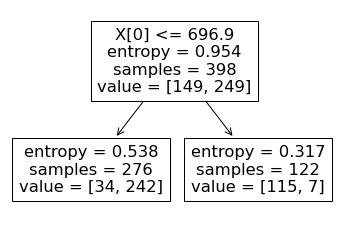

In [17]:
plot_tree(clf) # clf를 plot > plot_tree
plt.show() # 그래프 출력